In [1]:
from numpy import (dtype, int8, float32, complex64)
from numpy import (arange, zeros, pi, sqrt, cos, sin, abs, log10, random, fft)
from numpy import (real, imag)
import numpy as np
import matplotlib.pyplot as plt

#signal scenario and parameters
FFT_LENGTH = 32

M = FFT_LENGTH
D = 24
FINE_FFT_LENGTH = 512

Nsamps = FFT_LENGTH*23
print(Nsamps)

fs = 10e3
fs_os = fs/D
f = 4e3

if Nsamps:
    t = Nsamps/fs
else:
    t = 0.2
    Nsamps = int(t*fs)

n = arange(0, Nsamps)
x = zeros(Nsamps, dtype=complex64)

# generate samples
signal_power = 20
noise_power = 10

signal_amp = sqrt(signal_power)
noise_amp = sqrt(noise_power/2)

omega = 2*pi*f
signal = signal_amp*(cos(omega*n/fs) + 1j*sin(omega*n/fs))
noise = noise_amp*(random.randn(Nsamps) + 1j*random.randn(Nsamps))

x = signal + noise

# quantize
d_max = 127
d_min = -128
x_real = (real(x) - d_min)/(d_max-d_min) - 0.5
x_imag = (imag(x) - d_min)/(d_max-d_min) - 0.5 

x = x_real + 1j*x_imag

736


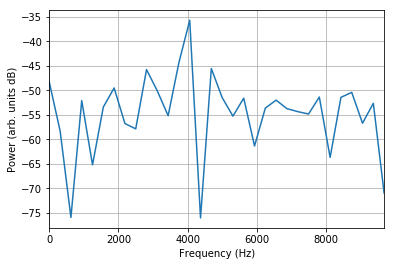

In [2]:
# plot an sample fft for verification of generated data
X = fft.fft(x, FFT_LENGTH)/FFT_LENGTH

# plot
fbins = arange(0, FFT_LENGTH)
faxis = fbins*fs/FFT_LENGTH

plt.plot(faxis, 20*log10(abs(X)))
plt.xlim([min(faxis), max(faxis)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (arb. units dB)')
plt.grid()
plt.show()

In [3]:
import pynq
from pynq import Xlnk
from pynq import Overlay

OVERLAY_PATH = '/home/xilinx/jupyter_notebooks/alpaca/overlay/pfb_d24/os_pfb.bit'
overlay = Overlay(OVERLAY_PATH)
dma = overlay.axi_dma_0

xlnk = Xlnk()
# in_buffer = xlnk.cma_array(shape=(Nsamps,), dtype=complex64, cacheable=1)
# out_buffer = xlnk.cma_array(shape=(Nsamps,), dtype=complex64, cacheable=1)
in_buffer = xlnk.cma_array(shape=(FFT_LENGTH,), dtype=complex64, cacheable=1)
out_buffer = xlnk.cma_array(shape=(FFT_LENGTH,), dtype=complex64, cacheable=1)

output_windows = int(Nsamps/FFT_LENGTH)
ospfb_output = np.zeros(shape=(FFT_LENGTH, output_windows), dtype=complex64)

#np.copyto(in_buffer, x)

def dma_transfer():
    dma.sendchannel.transfer(in_buffer)
    dma.recvchannel.transfer(out_buffer)
    print('waiting on transfers...')
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    print('done!')

In [4]:

print("DMA send running:", dma.sendchannel.running)
print("DMA send idle: ", dma.sendchannel.idle)
print("DMA recv running:", dma.recvchannel.running)
print("DMA rec  idle: ", dma.recvchannel.idle)

DMA send running: True
DMA send idle:  False
DMA recv running: True
DMA rec  idle:  False


In [5]:
i=0

In [27]:
idx = i*FFT_LENGTH
np.copyto(in_buffer, x[idx:idx+FFT_LENGTH])
print(i, idx, idx+(FFT_LENGTH-1), len(x[idx:idx+FFT_LENGTH]))

6 192 223 32


In [ ]:
i+=1
print(i)
dma_transfer()

23
waiting on transfers...


In [34]:
print(out_buffer)

[  1.37026027e-01+0.03629448j  -6.21479414e-02+0.01120764j
   5.66181839e-02-0.0229748j   -2.49907449e-02-0.0021652j
   6.15470260e-02-0.00705717j  -7.12357536e-02-0.0043727j
   4.20369618e-02+0.03835852j  -8.12996179e-04-0.012275j
   3.91009077e-02-0.04899278j   5.70566533e-03-0.0624722j
  -1.63936447e-02+0.04120082j   5.66197373e-02+0.01457833j
  -6.25296608e-02-0.04727719j   3.79364729e-01+0.10521971j
  -5.06938109e-03-0.13910727j  -7.60714561e-02-0.0554201j
   2.33481936e-02-0.03213969j   3.44495997e-02-0.02254693j
   2.20907256e-02+0.00858098j  -1.28985308e-02-0.01007984j
  -6.08932227e-03-0.01083546j   3.54153439e-02+0.00597657j
  -7.49237686e-02-0.04472969j   7.27716833e-05+0.00587788j
  -2.46155765e-02+0.0289018j   -2.21560858e-02+0.05774321j
   6.54187519e-04-0.03895658j   2.95892376e-02+0.03077863j
  -5.15537662e-03-0.01624046j   2.63689701e-02+0.04053541j
  -4.43929099e-02-0.01818142j   8.89388658e-03+0.00203279j]


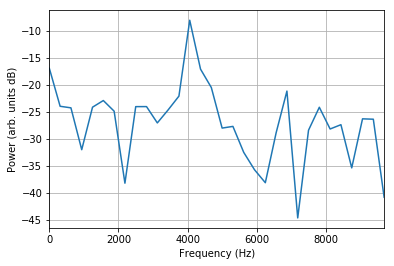

In [35]:
# coarse channel output
fbins = arange(0, FFT_LENGTH)
faxis = fbins*fs/FFT_LENGTH

plt.plot(faxis, 20*log10(abs(out_buffer)))
plt.xlim([min(faxis), max(faxis)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (arb. units dB)')
plt.grid()
plt.show()

In [29]:
for i in range(0, output_windows):
    idx = i*FFT_LENGTH
#     print(i, idx, idx+(FFT_LENGTH-1), len(x[idx:idx+FFT_LENGTH]))
    np.copyto(in_buffer, x[idx:idx+FFT_LENGTH])
    dma_transfer()
    np.copyto(ospfb_output[:, i], out_buffer)
    

waiting on transfers...
done!
waiting on transfers...
done!
waiting on transfers...
done!
waiting on transfers...
done!
waiting on transfers...
done!
waiting on transfers...
done!
waiting on transfers...
done!
waiting on transfers...
done!
waiting on transfers...
done!
waiting on transfers...
done!
waiting on transfers...
done!
waiting on transfers...
done!
waiting on transfers...
done!
waiting on transfers...
done!
waiting on transfers...
done!
waiting on transfers...
done!
waiting on transfers...
done!
waiting on transfers...
done!
waiting on transfers...
done!
waiting on transfers...
done!
waiting on transfers...
done!


In [ ]:
# second stage FFT output
fbins_os = fs_decimated/Nfft
hsov = fs/2*(1/D-1/M)/fbins_os
channel_bins = Nfft-hsov*2

full_pfb_spectrum = fft.fft(output_bufer, Nfft)/Nfft